# Setup

In [25]:
%matplotlib inline
from pylab import *
import math
from matplotlib import pyplot as plt
import numpy as np

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties_energyset as decay_energyset
reload(decay_energyset)

import decay_properties as decay
reload(decay)

import trigger_properties as RF
reload(RF)

<module 'trigger_properties' from 'trigger_properties.pyc'>

In [ ]:
# Generating data for plots
h = 37 #km
R = 6356. # km
ice =2
N = 2000000 # number of samples
E_nu = 19 #log energy in eV of incident neutrino 
E_cut = 15
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1
theta_view = radians(1.5)
    
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot

event_decay_alt=[]
event_efield=[]
event_view=[]
event_emg=[]
for j in range(0,steps):
    print j
    theta_src = radians(start+(end-start)*float(j)/steps)
    #print start+(end-start)*float(j)/steps
    
    #print np.degrees(theta_src), h,R,theta_view, N
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    #print A_deg, np.degrees(np.average(emg_angle))
    decay1 = decay_energyset.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0)

    A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay1.degree_eff_area()
    
    if len(ret_e_dot) != 0:
        trigger_result = RF.event_detection(A_ret, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src, A0,N0)
        decay_alt, Peak_Efield, view_angle, emg_angle = trigger_result.RF_efield_PLOT()
        for i in range(len(decay_alt)):
            event_decay_alt.append(decay_alt[i])
            event_efield.append(Peak_Efield[i])
            event_view.append(view_angle[i])
            event_emg.append(emg_angle[i])
    print "   "
    

In [ ]:
print event_decay_alt[:10]
print event_efield[:10]
print event_view[:10]
print event_emg[:10]

## Creation of Graphs to Verify Radio Beam Pattern

In [ ]:
# Input theta view
# Output E_peak
# Diff graph for each decay altitude
# Diff line for each emergence angle


theta_emg = [1,3,5,10,15,20,25,30,35,40]

for i in range(4):
    decay_alt_choice = i*3
    print decay_alt_choice
    event_efield_cut1 =[event_efield[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    event_view_cut1 =[event_view[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    event_emg_cut1 = [event_emg[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    for j in range(len(theta_emg)):
        theta_emg_choice =theta_emg[j]
        event_efield_cut2 =[1000*event_efield_cut1[num] for num in range(len(event_emg_cut1)) if round(event_emg_cut1[num]) == theta_emg_choice]
        event_view_cut2 = [event_view_cut1[num] for num in range(len(event_emg_cut1)) if round(event_emg_cut1[num]) == theta_emg_choice]
        print theta_emg[j], len(event_efield_cut2)
        #print event_view_cut2, event_efield_cut2
    
        ax.scatter(event_view_cut2, event_efield_cut2)
    ax.legend([ str(theta_emg[i]) for i in range(len(theta_emg))] , fontsize=14,bbox_to_anchor=(1.1, 1.05))
    plt.xlabel(r'$\theta_{view}$ (deg.)', fontsize=18)
    plt.ylabel(r'$E_{peak}$ (mV/m)', fontsize=18)
    plt.title("Tau Decay Altitude "+str(decay_alt_choice)+" km", fontsize=20)
    plt.xlim(0,1.5)
    #plt.ylim(0,.0002)
#     plt.show()
        

In [ ]:
# Input emergence angle
# Output E_peak
# Diff line for each decay altitude


fig = plt.figure(figsize=(7,7))
ax = plt.axes()

for i in range(10):
    decay_alt_choice = i
    print decay_alt_choice
    event_efield_cut1 =[1000*event_efield[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    event_emg_cut1 = [round(event_emg[num]) for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    x = np.linspace(0,40,41)
    max_efield=[]
    for i in x:
        event_efield_max = max([event_efield_cut1[num] for num in range(len(event_emg_cut1)) if event_emg_cut1[num]==i])
        max_efield.append(event_efield_max)

    ax.scatter(x, max_efield)
    
ax.legend([ str(i)+" km" for i in range(10)] , fontsize=14,bbox_to_anchor=(1.1, 1.05))
plt.xlabel(r'$\theta_{emg}$ (deg.)', fontsize=18)
plt.ylabel(r'$E_{peak}$ (mV/m)', fontsize=18)
plt.xlim([0,40])

In [ ]:
# Emergence angle 30˚
# Input theta_view
# Output E_peak
# Diff graph for each decay altitude

theta_emg_choice = 30

fig = plt.figure(figsize=(7,7))
ax = plt.axes()

for i in range(10):
    decay_alt_choice = i
    print decay_alt_choice
    event_view_cut1 =[event_view[num] for num in range(len(event_emg)) \
                        if (round(event_emg[num]) == theta_emg_choice and round(event_decay_alt[num]) == decay_alt_choice)]
    event_efield_cut1 = [1000*event_efield[num] for num in range(len(event_emg)) \
                        if (round(event_emg[num]) == theta_emg_choice and round(event_decay_alt[num]) == decay_alt_choice)]
    print len(event_view_cut1)
    ax.scatter(event_view_cut1, event_efield_cut1)
    
ax.legend([ str(i)+" km" for i in range(10)] , fontsize=14,bbox_to_anchor=(1.1, 1.05))
plt.xlabel(r'$\theta_{view}$ (deg.)', fontsize=18)
plt.ylabel(r'$E_{peak}$ (mV/m)', fontsize=18)
plt.title("Emergence angle "+r'$30^{\circ}$', fontsize=20)
plt.xlim([0,1.5])
        

## Making Histogram

In [26]:
# Generating data for plots
h = 37 #km
R = 6356. # km
ice =2
N = 2000000 # number of samples
E_nu = 19 #log energy in eV of incident neutrino 
E_cut = 15
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1
theta_view = radians(1.5)

event_decay_alt=[]
event_efield_mv=[]
event_view=[]
event_emg=[]

theta_src = radians(83)
#print start+(end-start)*float(j)/steps

#print np.degrees(theta_src), h,R,theta_view, N
geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
#print A_deg, np.degrees(np.average(emg_angle))
decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                         norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0)

A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay1.degree_eff_area()

print np.average(ret_decay_alt)
if len(ret_e_dot) != 0:
    trigger_result = RF.event_detection(A_ret, f_lo, f_high, Gain_dB, Nphased, \
                                    ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                    theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                    ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src, A0,N0)
    decay_alt, Peak_Efield, view_angle, emg_angle = trigger_result.RF_efield()
    for i in range(len(decay_alt)):
        event_decay_alt.append(decay_alt[i])
        event_efield_mv.append(1000*Peak_Efield[i])
        event_view.append(view_angle[i])
        event_emg.append(emg_angle[i])
print "   "
    

1.9788001648739333
   


[]

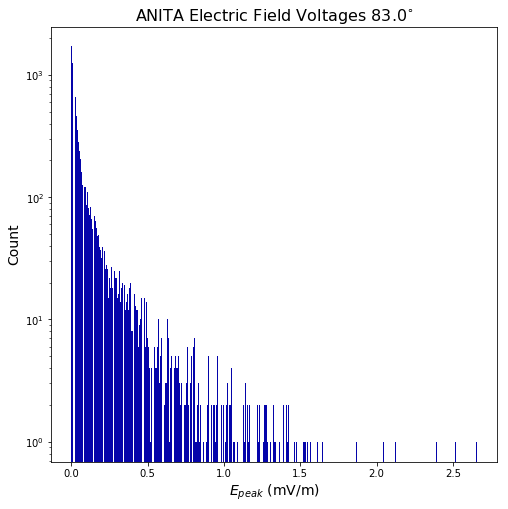

In [27]:
fig, ax = plt.subplots(num=1,figsize=(8,8))
        
plt.xlabel(r'$E_{peak}$ (mV/m)', fontsize=14)
plt.ylabel('Count', fontsize=14)
n, bins, patches = plt.hist(x=event_efield_mv, bins='auto', color='#0504aa',
                   rwidth=0.85)
plt.title("ANITA Electric Field Voltages "+str(round(np.degrees(theta_src)))+r'$^{\circ}$', fontsize=16)
#ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{:.3g}'))
#plt.figtext(.5,-0.1,"Voltage Cutoff "+'{:.3g}'.format(cutoff), fontsize=12, ha='center')
#plt.figtext(.5,-0.1,"Voltage Cutoff "+str(round(cutoff,6)), fontsize=12, ha='center')
plt.semilogy()

[]

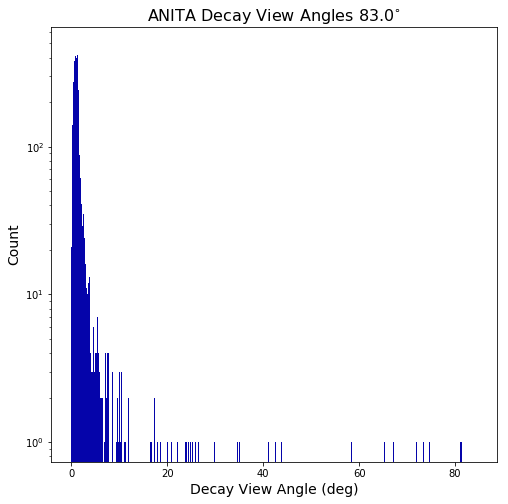

In [28]:
fig, ax = plt.subplots(num=1,figsize=(8,8))
        
plt.xlabel('Decay View Angle (deg)', fontsize=14)
plt.ylabel('Count', fontsize=14)
n, bins, patches = plt.hist(x=event_view, bins='auto', color='#0504aa',
                   rwidth=0.85)
plt.title("ANITA Decay View Angles "+str(round(np.degrees(theta_src)))+r'$^{\circ}$', fontsize=16)
#ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{:.3g}'))
#plt.figtext(.5,-0.1,"Voltage Cutoff "+'{:.3g}'.format(cutoff), fontsize=12, ha='center')
#plt.figtext(.5,-0.1,"Voltage Cutoff "+str(round(cutoff,6)), fontsize=12, ha='center')
plt.semilogy()